Coronavirus Outbreak Prediction using Support Vector Machine & Linear Regression Machine Learning Algorithms

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time

# Scikit-learn kit libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime
import operator
import seaborn as sns
sns.set_theme()  # sets seaborn style globally

%matplotlib inline



In [2]:
confirmed_cases = pd.read_csv('/home/aditya/Desktop/Coronavirus prediction analysis/time_series_covid-19_confirmed.csv')

confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
446,NaN,Congo (Brazzaville),-4.0383,21.7587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
448,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
deaths_reported = pd.read_csv('/home/aditya/Desktop/Coronavirus prediction analysis/time_series_covid-19_deaths.csv')

deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,NaN,Congo (Brazzaville),-4.0383,21.7587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
recovered_cases = pd.read_csv('/home/aditya/Desktop/Coronavirus prediction analysis/time_series_covid-19_recovered.csv')

recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,NaN,Congo (Brazzaville),-4.0383,21.7587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Extracting all columns using keys() function

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [6]:
# Extracting only the dates columns that have information of confirmed, deaths & recovered cases

confirmed = confirmed_cases.loc[ :, cols[4]:cols[-1] ]

deaths = deaths_reported.loc[ :, cols[4]:cols[-1] ]

recoveries = recovered_cases.loc[ :, cols[4]:cols[-1] ]

In [7]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,33,34,34,35,35,35
1,0,0,0,0,1,1,1,1,1,1,...,46,76,76,76,101,118,118,118,118,118
2,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Finding the total confirmed cases , death cases and the recovered cases ( on a single date ) & append them to 4 empty list
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()  # extracting dates

world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append( death_sum )
    mortality_rate.append( death_sum / confirmed_sum )
    total_recovered.append( recovered_sum )
    
print( confirmed_sum )
print( death_sum )
print( recovered_sum )


167449
6440
76034


In [11]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20'],
      dtype='object')

In [12]:
# Convert all the Dates & Cases in numpy array

days_since_1_22 = np.array([ i for i in range( len(dates) ) ]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)



In [13]:
# Future forecasting for next 10 days

days_in_future = 10
future_forecast = np.array([ i for i in range( len(dates) + days_in_future ) ]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

future_forecast




array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [14]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []

for i in range( len(future_forecast) ):
    future_forecast_dates.append( (start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y') )


future_forecast_dates


['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020']

In [15]:
# For visualization with latest data on 15th March

latest_confirmed = confirmed_cases[dates[-1]]

latest_deaths = deaths_reported[dates[-1]]

latest_recoveries = recovered_cases[dates[-1]]

confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
446,NaN,Congo (Brazzaville),-4.0383,21.7587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
448,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# Finding list of unique countries

unique_countries = list( confirmed_cases['Country/Region'].unique() )

unique_countries


['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [17]:
# Calculating total no. of confirmed cases

country_confirmed_cases = []
no_cases = []

for i in unique_countries:
    cases = latest_confirmed[ confirmed_cases['Country/Region'] == i ].sum()

    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [ k for k, v in sorted( zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True ) ]

for i in range( len(unique_countries) ):
    country_confirmed_cases[i] = latest_confirmed[ confirmed_cases['Country/Region'] == unique_countries[i] ].sum()


country_confirmed_cases

[81003,
 24747,
 13938,
 8162,
 7798,
 5795,
 4513,
 3499,
 2200,
 1221,
 1144,
 1135,
 1022,
 886,
 875,
 860,
 839,
 696,
 428,
 401,
 331,
 297,
 253,
 252,
 251,
 245,
 244,
 226,
 219,
 214,
 171,
 171,
 162,
 140,
 131,
 129,
 119,
 117,
 116,
 114,
 113,
 112,
 110,
 110,
 103,
 101,
 98,
 74,
 63,
 59,
 59,
 56,
 54,
 53,
 51,
 51,
 50,
 49,
 48,
 48,
 45,
 43,
 43,
 42,
 41,
 34,
 33,
 32,
 30,
 28,
 28,
 27,
 27,
 26,
 26,
 24,
 24,
 23,
 23,
 22,
 21,
 18,
 18,
 16,
 14,
 13,
 12,
 11,
 10,
 10,
 10,
 9,
 9,
 8,
 8,
 7,
 7,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [18]:
# No. of Cases per Country/Region

print('Confirmed Cases by Country/Region:')

for i in range( len(unique_countries) ):
    print( f'{unique_countries[i]}:  {country_confirmed_cases[i]} cases ' )


Confirmed Cases by Country/Region:
China:  81003 cases 
Italy:  24747 cases 
Iran:  13938 cases 
Korea, South:  8162 cases 
Spain:  7798 cases 
Germany:  5795 cases 
France:  4513 cases 
US:  3499 cases 
Switzerland:  2200 cases 
Norway:  1221 cases 
United Kingdom:  1144 cases 
Netherlands:  1135 cases 
Sweden:  1022 cases 
Belgium:  886 cases 
Denmark:  875 cases 
Austria:  860 cases 
Japan:  839 cases 
Cruise Ship:  696 cases 
Malaysia:  428 cases 
Qatar:  401 cases 
Greece:  331 cases 
Australia:  297 cases 
Czechia:  253 cases 
Canada:  252 cases 
Israel:  251 cases 
Portugal:  245 cases 
Finland:  244 cases 
Singapore:  226 cases 
Slovenia:  219 cases 
Bahrain:  214 cases 
Estonia:  171 cases 
Iceland:  171 cases 
Brazil:  162 cases 
Philippines:  140 cases 
Romania:  131 cases 
Ireland:  129 cases 
Poland:  119 cases 
Indonesia:  117 cases 
Iraq:  116 cases 
Thailand:  114 cases 
India:  113 cases 
Kuwait:  112 cases 
Egypt:  110 cases 
Lebanon:  110 cases 
Saudi Arabia:  103 ca

In [19]:
# Find the list of unique provinces

unique_provinces = list( confirmed_cases['Province/State'].unique() )

# Countries which are not provinces or states
outliers = ['United Kingdom', 'Denmark', 'France']

for i in outliers:
    unique_provinces.remove(i)


unique_provinces

[nan,
 'British Columbia',
 'New South Wales',
 'Victoria',
 'Queensland',
 'South Australia',
 'From Diamond Princess',
 'Western Australia',
 'Tasmania',
 'Northern Territory',
 'Ontario',
 'Alberta',
 'Quebec',
 'Washington',
 'New York',
 'California',
 'Massachusetts',
 'Diamond Princess',
 'Grand Princess',
 'Georgia',
 'Colorado',
 'Florida',
 'New Jersey',
 'Oregon',
 'Texas',
 'Illinois',
 'Pennsylvania',
 'Iowa',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'Arizona',
 'Indiana',
 'Kentucky',
 'District of Columbia',
 'Nevada',
 'New Hampshire',
 'Minnesota',
 'Nebraska',
 'Ohio',
 'Rhode Island',
 'Wisconsin',
 'Connecticut',
 'Hawaii',
 'Oklahoma',
 'Utah',
 'Kansas',
 'Louisiana',
 'Missouri',
 'Vermont',
 'Alaska',
 'Arkansas',
 'Delaware',
 'Idaho',
 'Maine',
 'Michigan',
 'Mississippi',
 'Montana',
 'New Mexico',
 'North Dakota',
 'South Dakota',
 'West Virginia',
 'Wyoming',
 'Hubei',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'Hunan',
 'An

In [20]:
# Finding no. of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []

for i in unique_provinces:
    cases = latest_confirmed[ confirmed_cases['Province/State'] == i ].sum()

    if cases > 0:
        province_confirmed_cases.append(cases)

    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)


province_confirmed_cases

[73,
 134,
 57,
 61,
 20,
 17,
 6,
 1,
 104,
 39,
 24,
 643,
 732,
 426,
 164,
 742,
 23,
 99,
 131,
 115,
 98,
 36,
 72,
 93,
 66,
 18,
 32,
 33,
 28,
 39,
 45,
 13,
 20,
 20,
 16,
 24,
 13,
 35,
 17,
 37,
 20,
 32,
 24,
 6,
 7,
 28,
 8,
 91,
 5,
 8,
 1,
 16,
 7,
 5,
 12,
 33,
 10,
 7,
 13,
 1,
 9,
 3,
 67794,
 1360,
 1273,
 1231,
 1018,
 990,
 935,
 760,
 631,
 576,
 539,
 482,
 442,
 353,
 318,
 296,
 252,
 245,
 174,
 168,
 146,
 136,
 133,
 133,
 145,
 125,
 93,
 76,
 75,
 75,
 18,
 10,
 11,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 4,
 2,
 12,
 5,
 1,
 7,
 3,
 1,
 1,
 1]

In [21]:
# no of cases per province, city or state

for i in range( len(unique_provinces) ):
    print( f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases' )


British Columbia: 73 cases
New South Wales: 134 cases
Victoria: 57 cases
Queensland: 61 cases
South Australia: 20 cases
Western Australia: 17 cases
Tasmania: 6 cases
Northern Territory: 1 cases
Ontario: 104 cases
Alberta: 39 cases
Quebec: 24 cases
Washington: 643 cases
New York: 732 cases
California: 426 cases
Massachusetts: 164 cases
Diamond Princess: 742 cases
Grand Princess: 23 cases
Georgia: 99 cases
Colorado: 131 cases
Florida: 115 cases
New Jersey: 98 cases
Oregon: 36 cases
Texas: 72 cases
Illinois: 93 cases
Pennsylvania: 66 cases
Iowa: 18 cases
Maryland: 32 cases
North Carolina: 33 cases
South Carolina: 28 cases
Tennessee: 39 cases
Virginia: 45 cases
Arizona: 13 cases
Indiana: 20 cases
Kentucky: 20 cases
District of Columbia: 16 cases
Nevada: 24 cases
New Hampshire: 13 cases
Minnesota: 35 cases
Nebraska: 17 cases
Ohio: 37 cases
Rhode Island: 20 cases
Wisconsin: 32 cases
Connecticut: 24 cases
Hawaii: 6 cases
Oklahoma: 7 cases
Utah: 28 cases
Kansas: 8 cases
Louisiana: 91 cases
Mis

In [22]:
# Handling NaN values if any

nan_indices = []

for i in range(len(unique_provinces)):
    if type( unique_provinces[i] ) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list( province_confirmed_cases )

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)
    
    


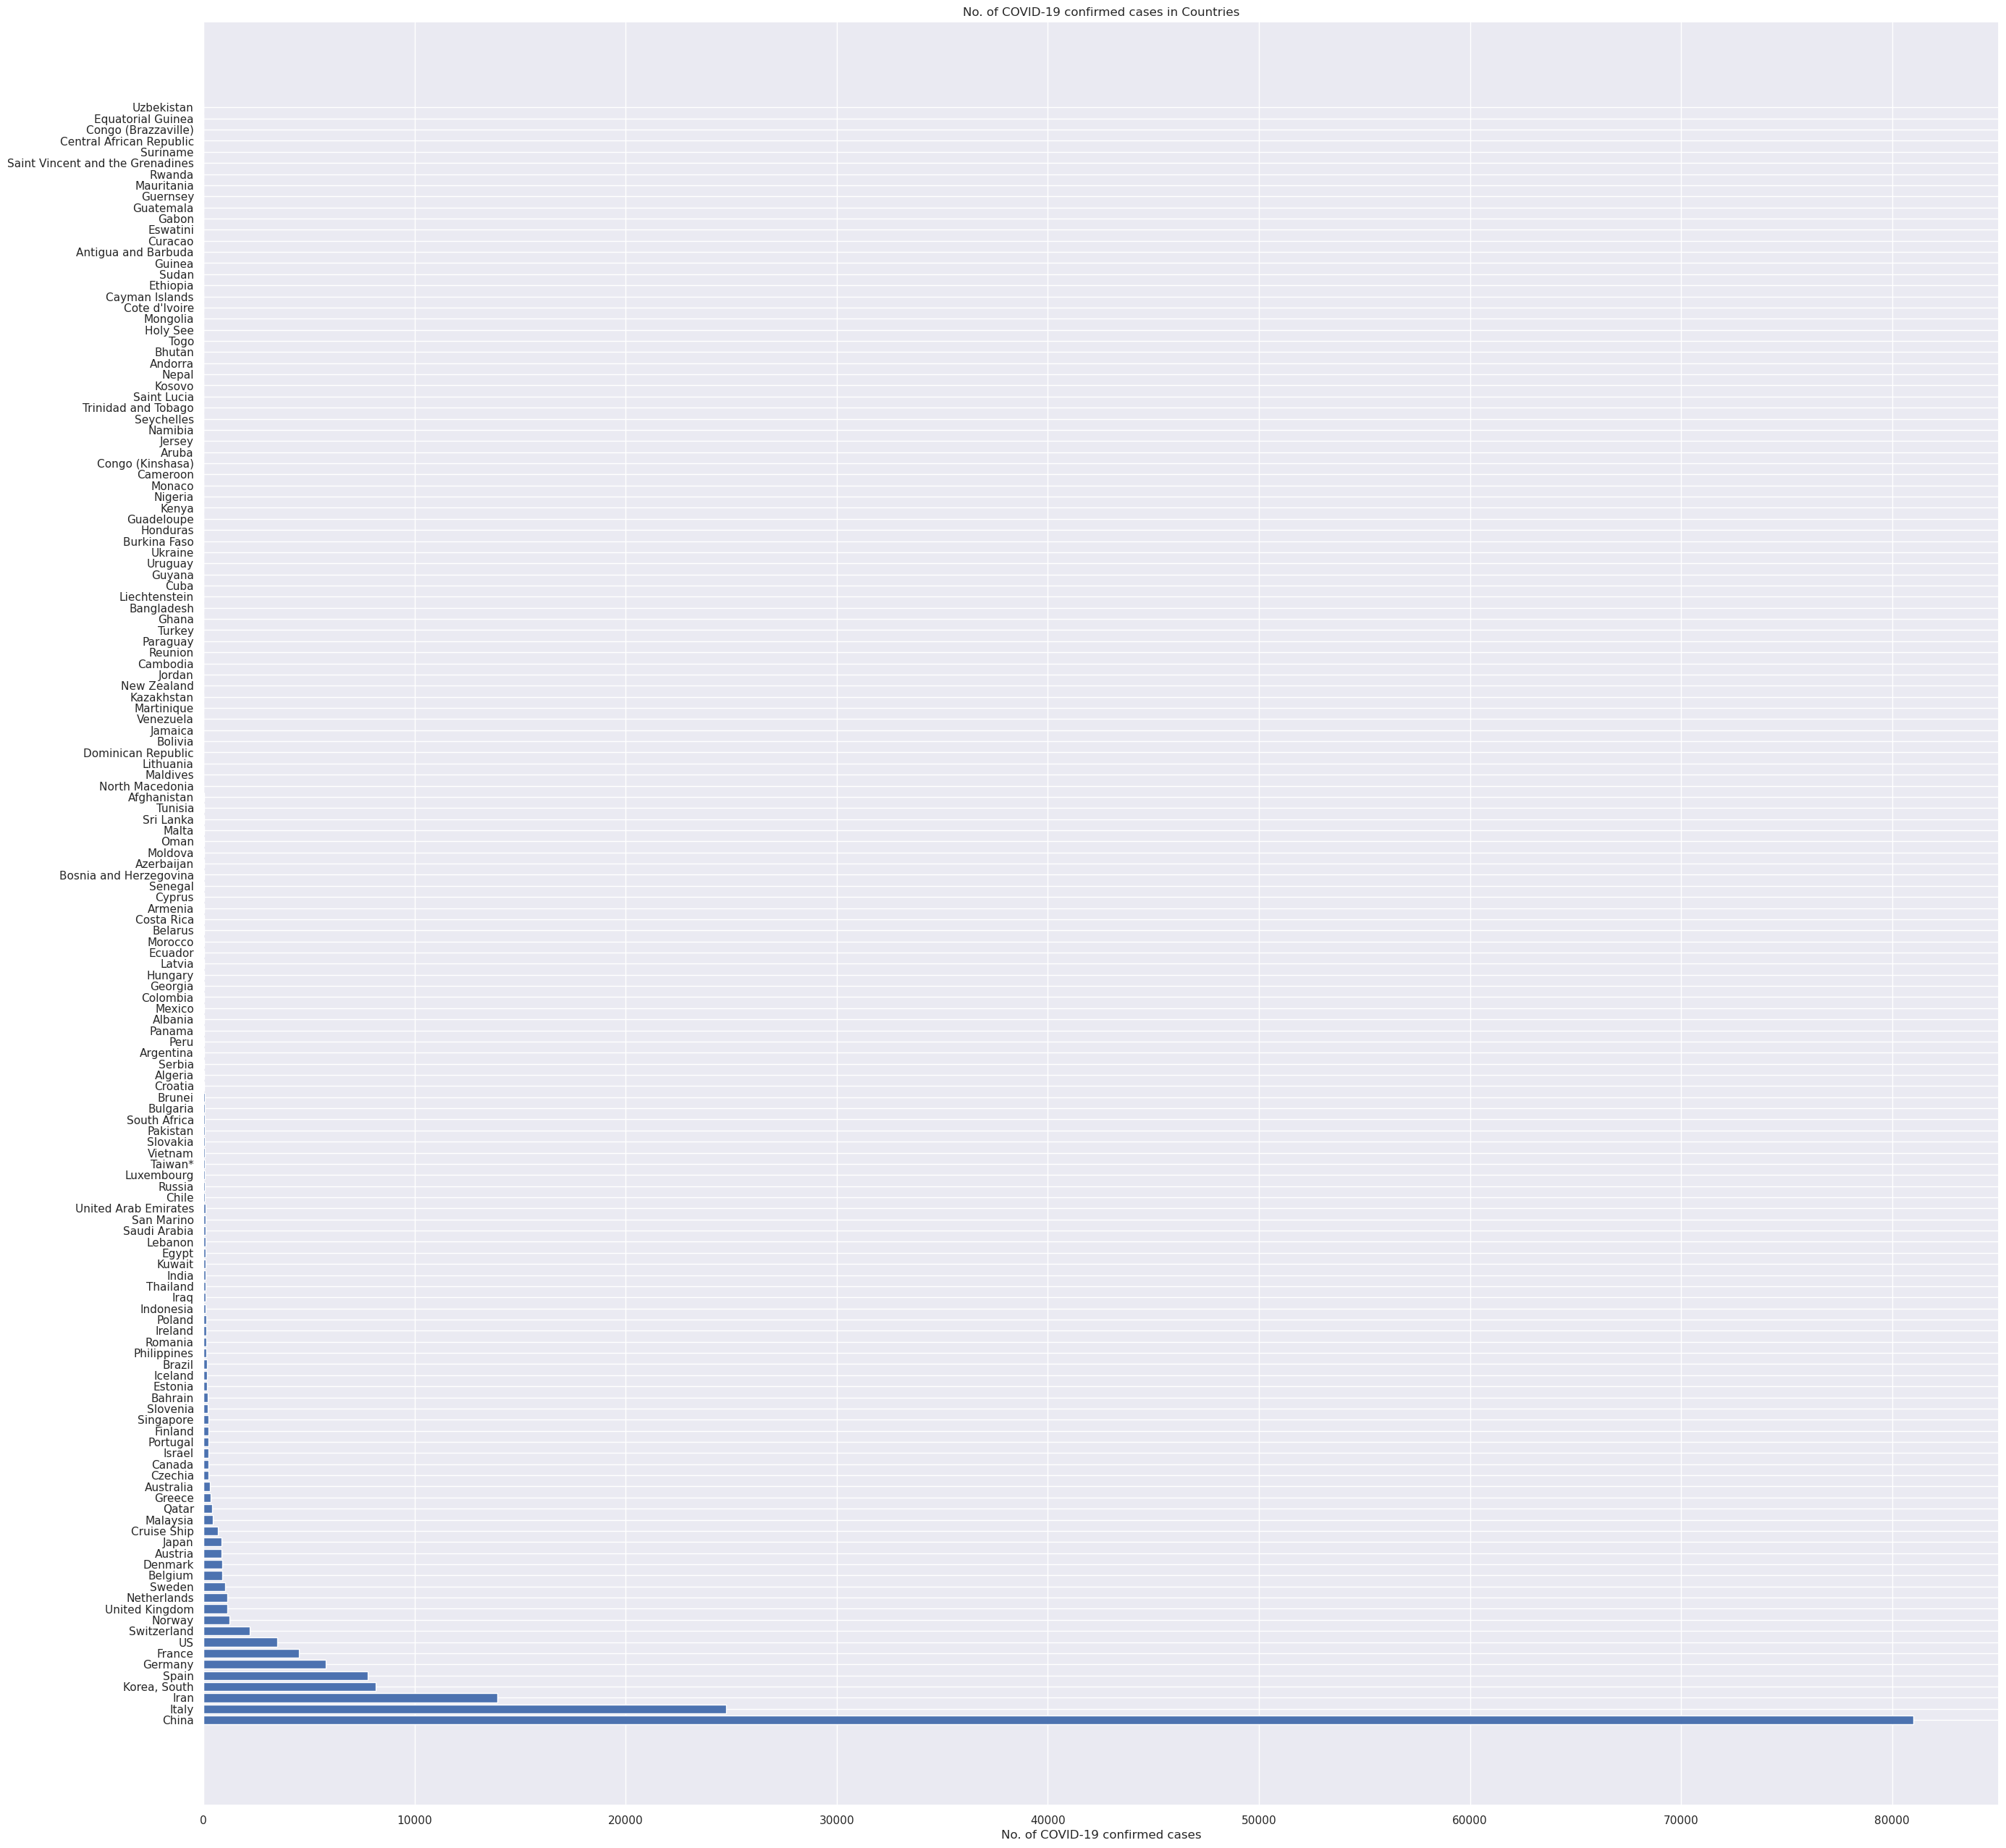

In [23]:
# Plot a bar-graph to see the total confirmed cases across different countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title( "No. of COVID-19 confirmed cases in Countries" )
plt.xlabel("No. of COVID-19 confirmed cases")
plt.show()


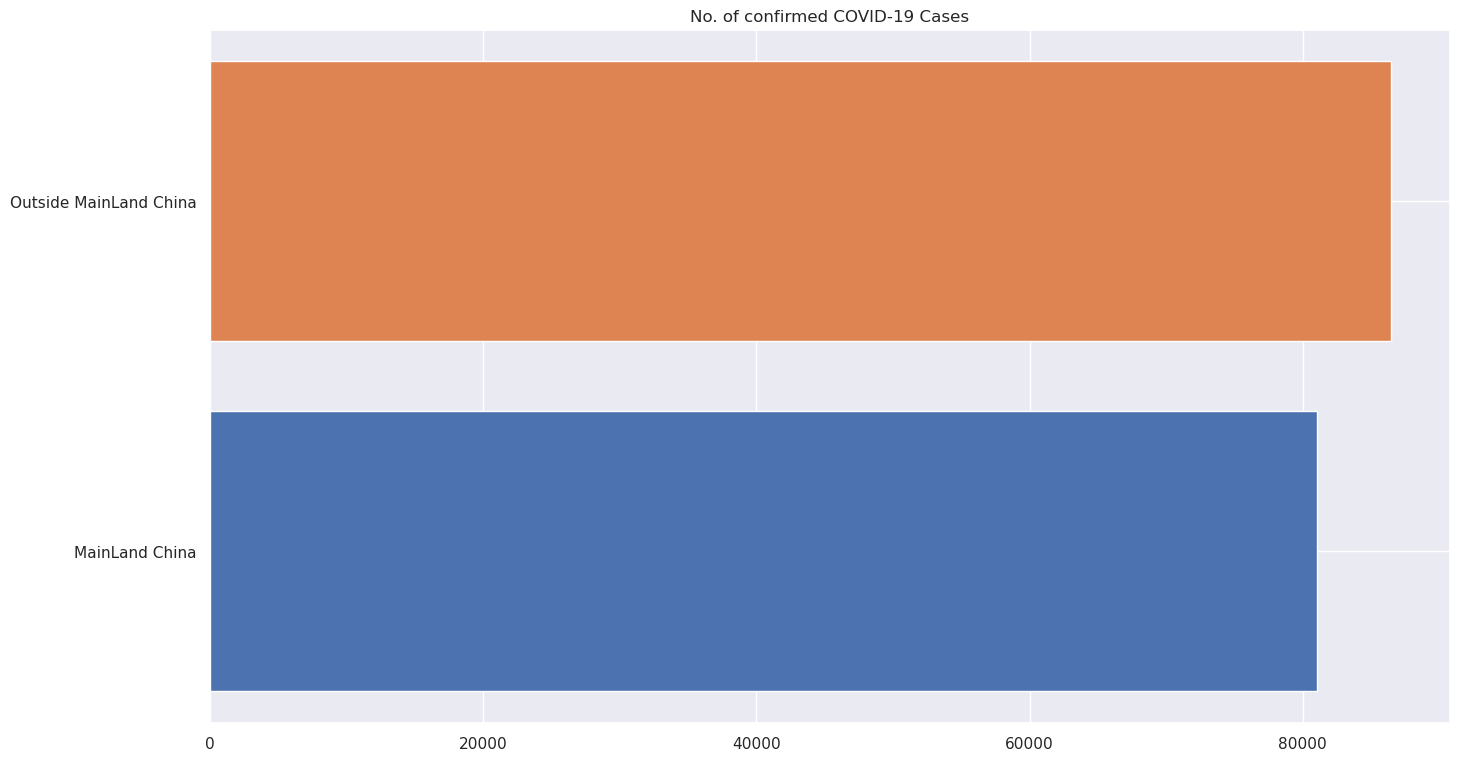

In [24]:
# Plot a bar-graph to see the total confirmed cases between Mainland & China and outside Mainland China

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('MainLand China', china_confirmed)
plt.barh( 'Outside MainLand China', outside_mainland_china_confirmed )
plt.title("No. of confirmed COVID-19 Cases")
plt.show()


In [25]:
# Print total cases in Mainland China and outside it

print( 'Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed) )
print( 'Mainland China: {} cases'.format(china_confirmed) )
print( 'Total {} cases'.format(china_confirmed+outside_mainland_china_confirmed) )


Outside Mainland China 86446 cases:
Mainland China: 81003 cases
Total 167449 cases


In [26]:
# Only show top 10 countries with most no. of cases, mark rest as 'others'

visual_unique_countries = []
visual_confirmed_cases = []

others = np.sum( country_confirmed_cases[10:] )

for i in range( len(country_confirmed_cases[:10]) ):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append( 'Others' )
visual_confirmed_cases.append(others)

# 17:23

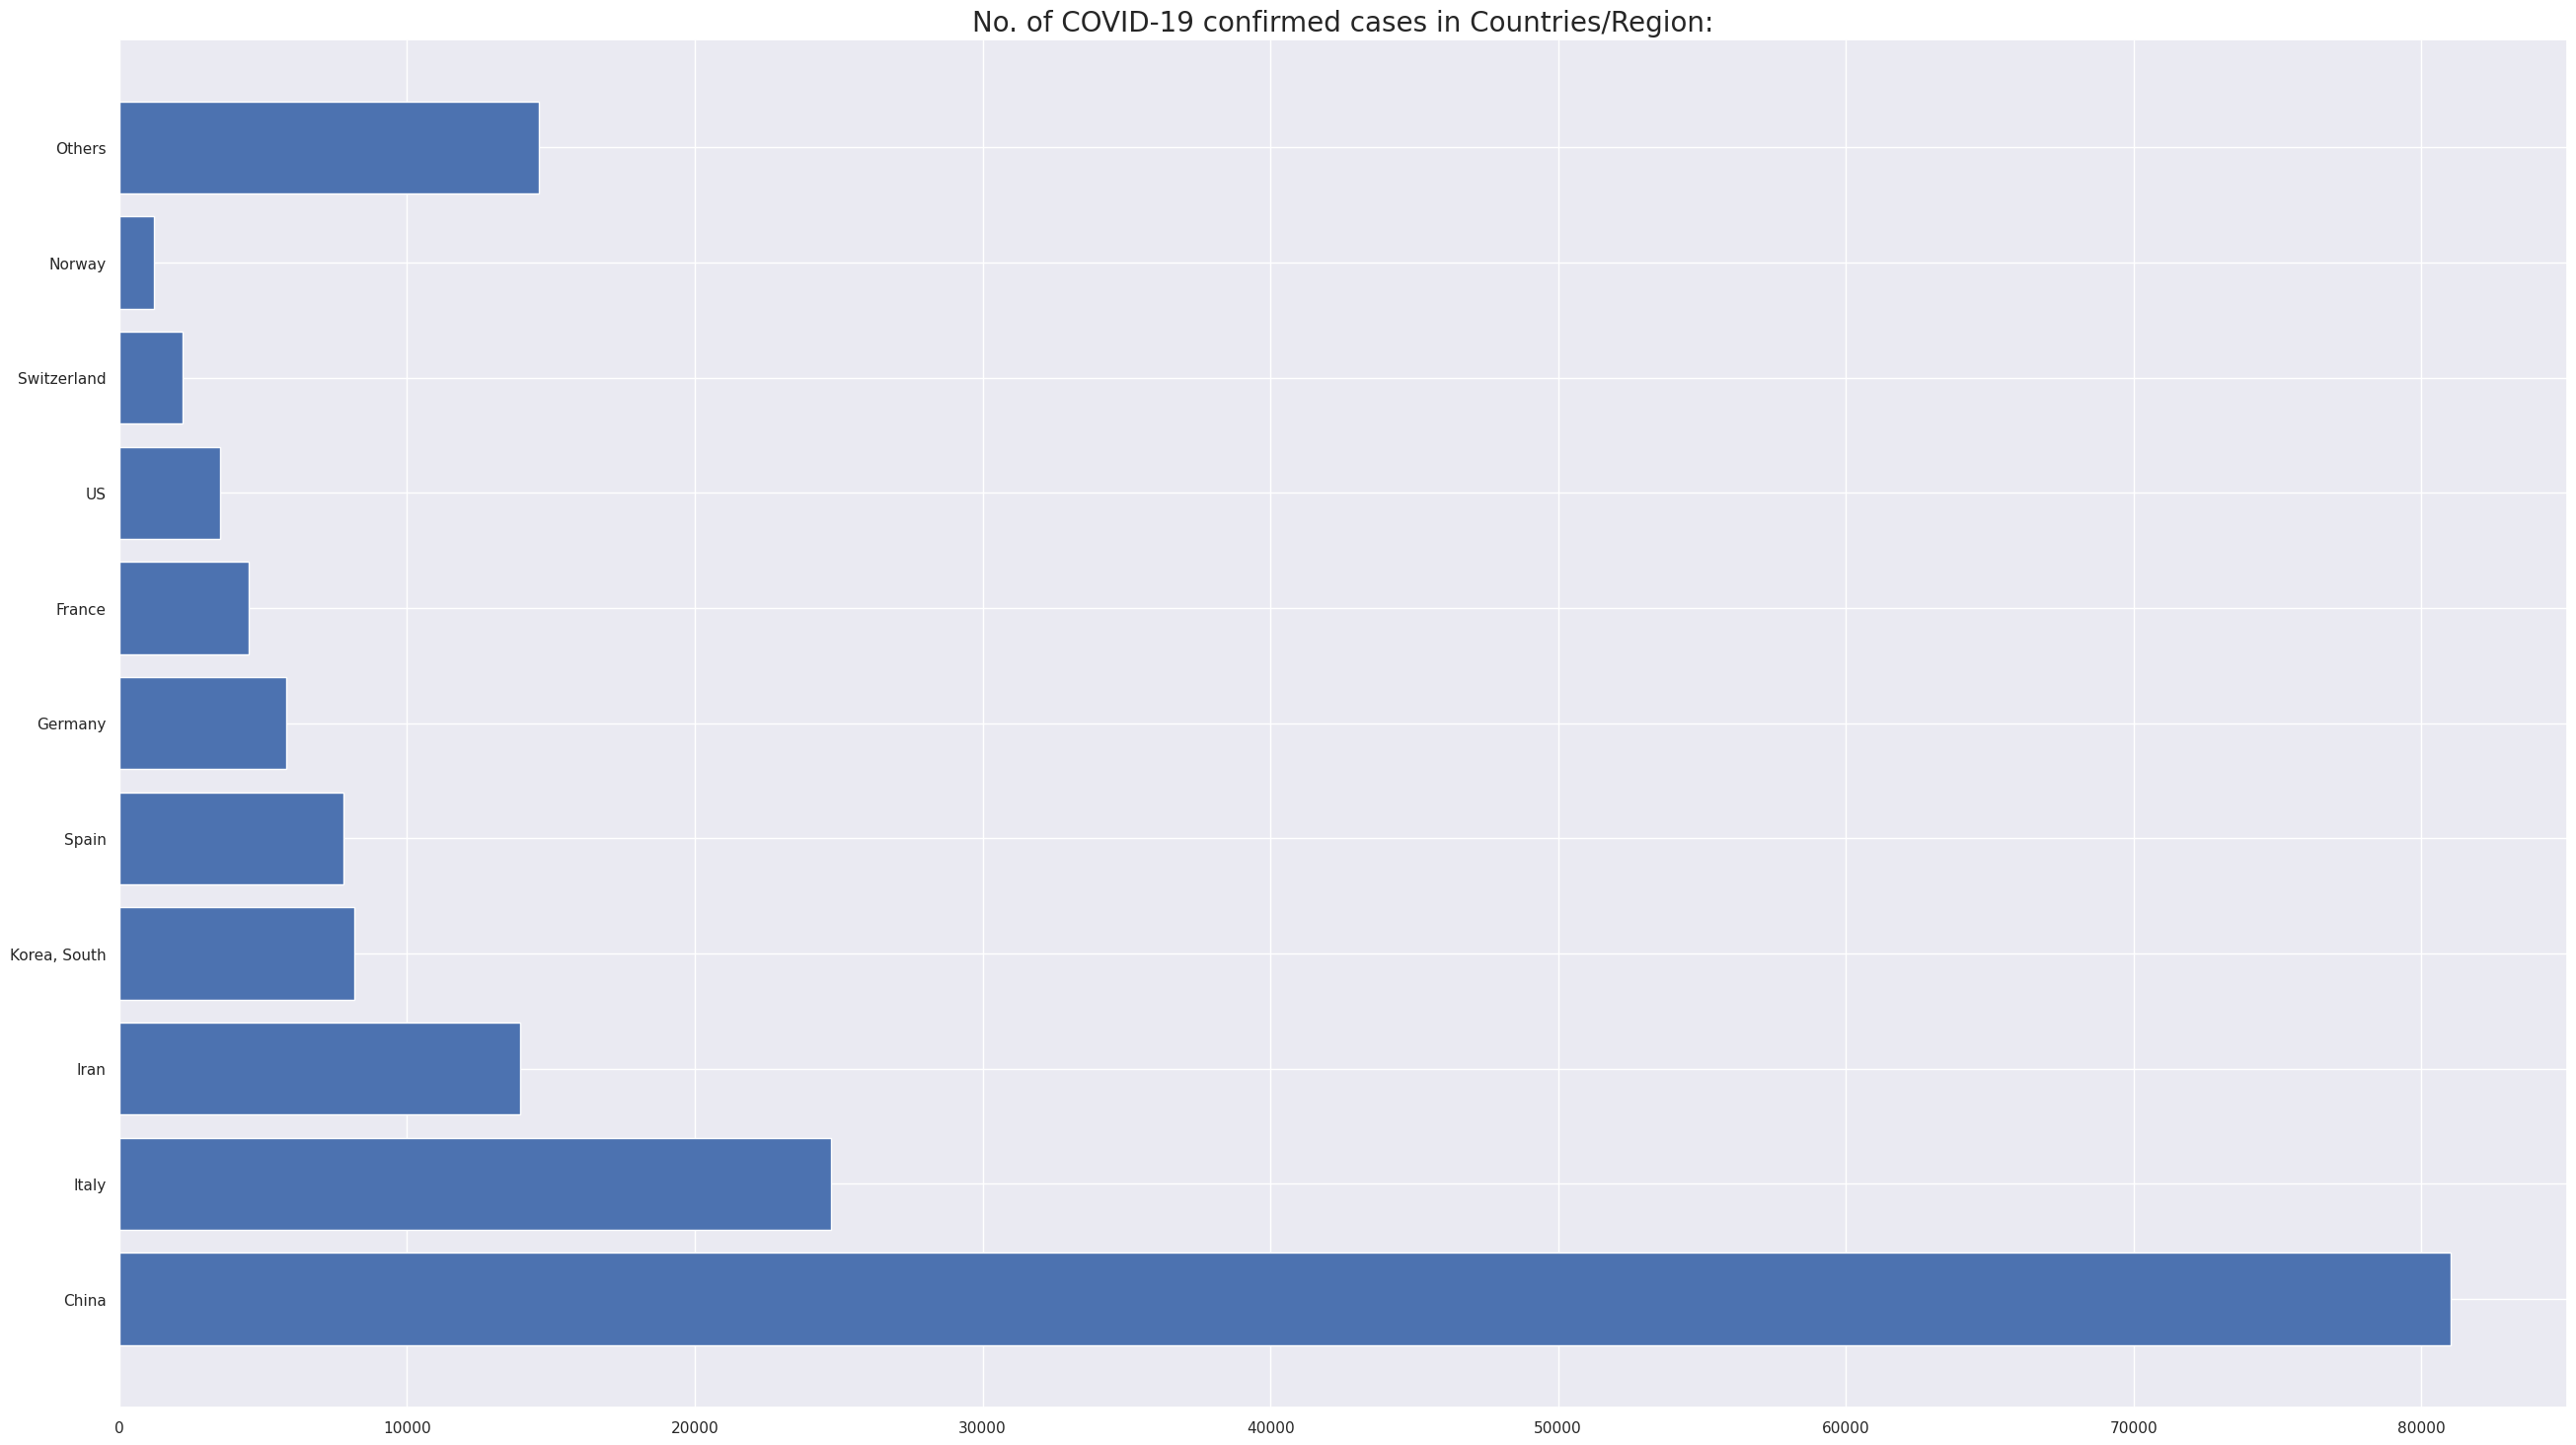

In [27]:
# Visualize the 10 countries using bar graph

plt.figure( figsize=(32,18) )
plt.barh( visual_unique_countries, visual_confirmed_cases )
plt.title( 'No. of COVID-19 confirmed cases in Countries/Region:', size=20 )
plt.show()


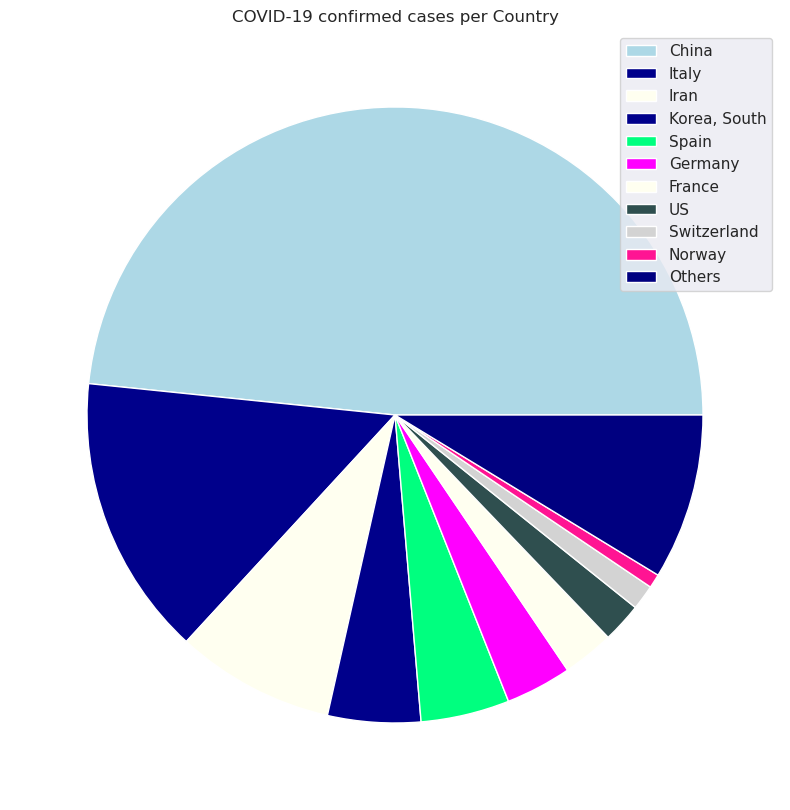

In [28]:
# Create Pie-Chart to see total no. of cases in the 10 different countries 

c = random.choices( list(mcolors.CSS4_COLORS.values()), k=len(unique_countries) )
plt.figure( figsize=(10,10) )
plt.title('COVID-19 confirmed cases per Country')
plt.pie( visual_confirmed_cases, colors=c )
plt.legend(visual_unique_countries, loc='best')
plt.show()





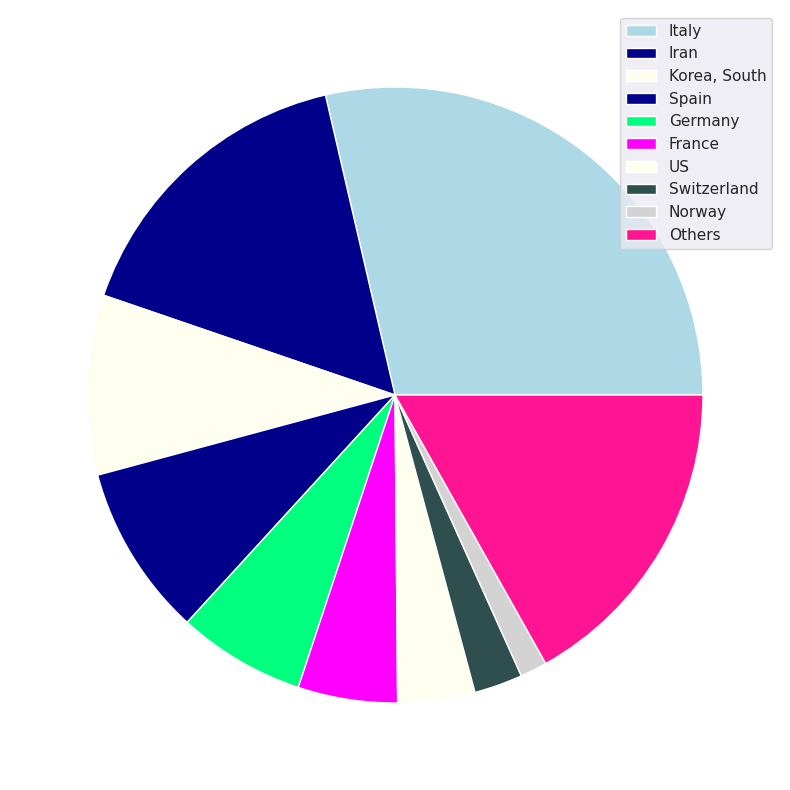

In [29]:
# Create Pie-Chart to see total no. of confirmed cases in 10 different countries outside China

plt.figure(figsize=(10,10))
plt.pie( visual_confirmed_cases[1:], colors=c )
plt.legend( visual_unique_countries[1:], loc='best' )
plt.show()



SUPPORT VECTOR MACHINE MODEL

In [30]:
kernel = [ 'poly', 'sigmoid', 'rbf' ]
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = { 'kernel' : kernel, 
            'C' : c, 
            'gamma' : gamma,
            'epsilon' : epsilon,
            'shrinking' : shrinking
           }



svm = SVR()
svm_search = RandomizedSearchCV( svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1 ) 


# Train-test split for confirmed cases
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(
    days_since_1_22,
    world_cases,
    test_size=0.15,
    shuffle=False
)




svm_search.fit( X_train_confirmed, y_train_confirmed )





Fitting 3 folds for each of 40 candidates, totalling 120 fits


/home/aditya/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aditya/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aditya/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aditya/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [31]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1, 'C': 0.01}

In [32]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_search.predict( future_forecast )

In [33]:
svm_confirmed

SVR(C=0.01, epsilon=1, gamma=0.1, kernel='poly', shrinking=False)

In [34]:
svm_pred

array([ 30388.34440129,  30389.32185622,  30396.1640407 ,  30414.73568429,
        30450.90151654,  30510.52626702,  30599.47466527,  30723.61144085,
        30888.80132331,  31100.90904222,  31365.79932711,  31689.33690756,
        32077.38651311,  32535.81287332,  33070.48071775,  33687.25477594,
        34391.99977746,  35190.58045185,  36088.86152868,  37092.7077375 ,
        38207.98380786,  39440.55446933,  40796.28445144,  42281.03848376,
        43900.68129585,  45661.07761726,  47568.09217753,  49627.58970624,
        51845.43493293,  54227.49258716,  56779.62739848,  59507.70409644,
        62417.58741062,  65515.14207054,  68806.23280579,  72296.7243459 ,
        75992.48142043,  79899.36875894,  84023.25109098,  88369.99314611,
        92945.45965388,  97755.51534385, 102806.02494557, 108102.8531886 ,
       113651.86480248, 119458.92451679, 125529.89706107, 131870.64716488,
       138487.03955776, 145384.93896929, 152570.210129  , 160048.71776646,
       167826.32661123, 1

Mean Absolute Error:  16263.289241035274
Mean Squared Error:  284717873.5156596


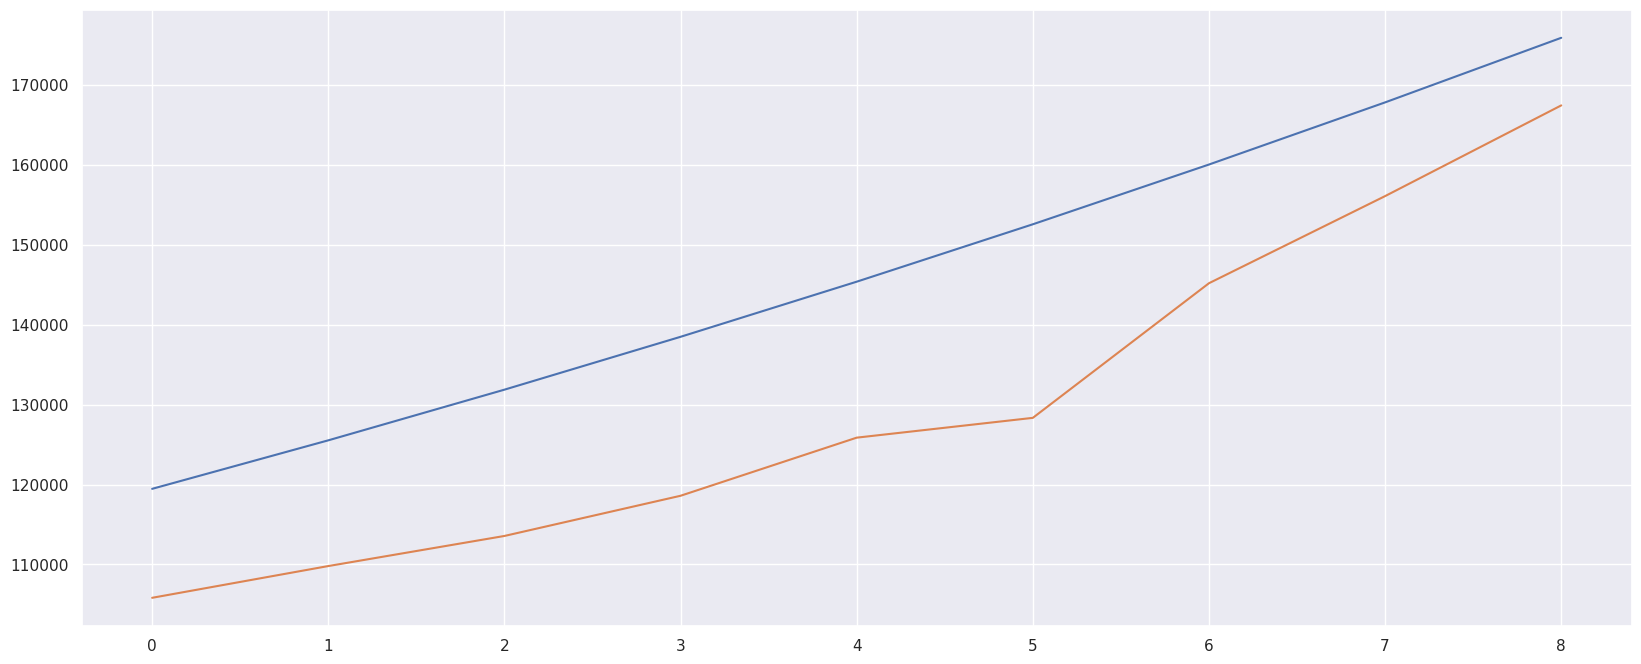

In [43]:
# Checking the prediction against real prediction ( svm_pred, y_test_data )

svm_test_pred = svm_confirmed.predict( X_test_confirmed )
plt.figure( figsize=(20,8) )
plt.plot( svm_test_pred )
plt.plot( y_test_confirmed )

print( "Mean Absolute Error: ", mean_absolute_error(svm_test_pred, y_test_confirmed) )
print( "Mean Squared Error: ", mean_squared_error(svm_test_pred, y_test_confirmed) )

plt.show()
